# calculating video frames count of all videos

In [1]:
import json
import glob
import numpy as np
import cv2
import copy
import os



In [13]:
#change the path accordingly
video_files =  os.listdir('fake_videos')

print(len(video_files))
frame_count = []
sum=0
count=0

for video_file in video_files:
#     print(video_file)
    f='fake_videos'+"/"+video_file

    cap = cv2.VideoCapture(f)
    frames_len=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     print(frames_len)
    frame_count.append(frames_len)
#     sum=sum+frames_len
#     #if frames_len <170:
#        # count+=1
print("frames" , frame_count)
print (sum)
# print (count)



5299
frames [469, 303, 529, 534, 319, 234, 262, 334, 225, 165, 359, 317, 322, 319, 479, 234, 334, 165, 359, 322, 319, 234, 262, 334, 225, 464, 165, 359, 317, 322, 319, 234, 262, 334, 225, 165, 520, 359, 317, 319, 234, 262, 334, 225, 165, 359, 317, 322, 322, 319, 234, 262, 334, 225, 165, 359, 317, 322, 343, 319, 234, 262, 334, 225, 165, 359, 317, 322, 319, 318, 334, 165, 359, 322, 165, 359, 322, 334, 359, 317, 161, 322, 319, 234, 262, 334, 225, 165, 359, 317, 319, 496, 310, 283, 312, 365, 333, 332, 310, 283, 312, 365, 380, 333, 283, 312, 333, 310, 312, 365, 333, 310, 283, 459, 322, 273, 312, 365, 333, 332, 283, 273, 312, 365, 333, 343, 332, 310, 283, 273, 312, 333, 332, 273, 312, 333, 318, 310, 283, 312, 365, 325, 332, 318, 309, 319, 186, 161, 307, 308, 314, 306, 308, 318, 309, 319, 307, 308, 496, 314, 306, 316, 318, 309, 319, 186, 307, 314, 306, 380, 316, 319, 186, 306, 316, 318, 309, 319, 186, 307, 322, 308, 314, 306, 316, 318, 309, 319, 186, 308, 314, 343, 306, 316, 318, 319, 186, 31

In [14]:
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

Total number of videos:  5299
Average frame per video: 375.3245895451972


In [45]:
folder_path = 'real_videos'  # Replace with the path to your folder containing video files

frame_count = []

for video_file in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, video_file)):
#         print(video_file, end=" ")
        file_path = os.path.join(folder_path, video_file)

        # Use cv2.VideoCapture with the file_path
        cap = cv2.VideoCapture(file_path)

        frames_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_count.append(frames_len)
#         print(frames_len)
print("frames" , frame_count)        

frames [469, 350, 322, 333, 499, 325, 318, 319, 186, 307, 308, 314, 306, 308, 351, 316, 292, 315, 317, 319, 321, 337, 339, 308, 323, 517, 243, 342, 341, 250, 327, 309, 315, 321, 323, 315, 318, 327, 320, 322, 249, 350, 336, 307, 338, 334, 317, 172, 288, 340, 283, 307, 1, 295, 331, 330, 333, 310, 380, 332, 332, 323, 342, 429, 310, 434, 344, 364, 468, 535, 472, 306, 445, 307, 380, 470, 322, 504, 451, 465, 373, 470, 404, 448, 366, 497, 479, 423, 369, 485, 349, 441, 365, 461, 475, 516, 571, 428, 431, 457, 479, 441, 357, 446, 490, 417, 266, 503, 455, 480, 419, 322, 394, 529, 313, 472, 478, 470, 516, 485, 508, 380, 256, 295, 228, 350, 399, 321, 448, 468, 478, 482, 307, 502, 290, 458, 327, 353, 454, 473, 483, 466, 261, 301, 475, 457, 459, 320, 467, 456, 492, 585, 321, 315, 310, 315, 335, 334, 397, 312, 313, 458, 372, 499, 398, 409, 361, 497, 319, 330, 320, 332, 326, 322, 317, 331, 310, 306, 310, 332, 398, 332, 314, 230, 321, 332, 329, 315, 347, 315, 310, 364, 352, 319, 492, 319, 333, 313, 314,

In [46]:
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

Total number of videos:  712
Average frame per video: 405.14606741573033


# saving frames of videos in .jpg format of fake and real videos

In [52]:

# Create a directory to store the images
output_directory = 'fake_images'
os.makedirs(output_directory, exist_ok=True)

classifier = cv2.CascadeClassifier('hcd.xml') 

# Opens the Video file
directory = os.listdir('fake_videos')

for video_file in directory:
    f = 'fake_videos' + "/" + video_file
    cap = cv2.VideoCapture(f)
    i = 0

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break

        if i % 50 == 0:
            faces = classifier.detectMultiScale(frame, minNeighbors=10)
            for (x, y, w, h) in faces:
                roi = frame[y:y+h, x:x+w]
                image_name = os.path.splitext(video_file)[0] + str(i) + '.jpg'
                image_path = os.path.join(output_directory, image_name)
                cv2.imwrite(image_path, roi)

        i += 1

    cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


In [ ]:

# Create a directory to store the images
output_directory = 'real_images'
os.makedirs(output_directory, exist_ok=True)

classifier = cv2.CascadeClassifier('hcd.xml') 

# Opens the Video file
directory = os.listdir('real_videos')

for video_file in directory:
    f = 'real_videos' + "/" + video_file
    cap = cv2.VideoCapture(f)
    i = 0

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            break

        if i % 50 == 0:
            faces = classifier.detectMultiScale(frame, minNeighbors=10)
            for (x, y, w, h) in faces:
                roi = frame[y:y+h, x:x+w]
                image_name = os.path.splitext(video_file)[0] + str(i) + '.jpg'
                image_path = os.path.join(output_directory, image_name)
                cv2.imwrite(image_path, roi)

        i += 1

    cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


#  preprocessing data 

In [53]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.5.0
2.5.0


In [54]:
idg=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, # You can uncomment these parameters to make you generator rotate & flip the images to put the train model in stricter conditions.
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    #validation_split=0.2
)

In [55]:
train_gen = idg.flow_from_directory("data2/train_data",
                                                   target_size=(128,128),                                                   
                                                   subset='training',
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=1
                                                )

Found 13725 images belonging to 2 classes.


In [56]:
train_gen.class_indices

{'fake': 0, 'real': 1}

In [57]:
print(train_gen)

In [58]:
val_gen = idg.flow_from_directory("data2/validation",
                                                   target_size=(128,128),                                                   
                                                   #subset='validation',
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True,
                                                 
                                                )

Found 3208 images belonging to 2 classes.


# importing some pretrained models

In [59]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from tensorflow.keras.applications.resnet import ResNet101

In [60]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
input_shape = (128,128, 3)
googleNet_model =ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True

model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(units=2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [61]:
# early_stopping = EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=3,
#                               verbose=0,
#                               restore_best_weights = True)

checkpoint=tf.keras.callbacks.ModelCheckpoint(
   'final_InceptionV3.h5',
    save_best_only=True)




EPOCHS = 20
BATCH_SIZE =32
history = model.fit(train_gen, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = val_gen, verbose = 1,callbacks=checkpoint)

Epoch 1/20
429/429 [==============================] - 113s 229ms/step - loss: 0.4171 - accuracy: 0.8071 - val_loss: 86.6279 - val_accuracy: 0.5000


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
429/429 [==============================] - 93s 217ms/step - loss: 0.2247 - accuracy: 0.9107 - val_loss: 2.7564 - val_accuracy: 0.4863
Epoch 3/20
429/429 [==============================] - 93s 217ms/step - loss: 0.1634 - accuracy: 0.9344 - val_loss: 0.4028 - val_accuracy: 0.8314
Epoch 4/20
429/429 [==============================] - 94s 218ms/step - loss: 0.1256 - accuracy: 0.9517 - val_loss: 0.1599 - val_accuracy: 0.9377
Epoch 5/20
429/429 [==============================] - 96s 223ms/step - loss: 0.0987 - accuracy: 0.9613 - val_loss: 0.1172 - val_accuracy: 0.9560
Epoch 6/20
429/429 [==============================] - 95s 221ms/step - loss: 0.0799 - accuracy: 0.9706 - val_loss: 0.0873 - val_accuracy: 0.9651
Epoch 7/20
429/429 [==============================] - 96s 223ms/step - loss: 0.0706 - accuracy: 0.9732 - val_loss: 0.1174 - val_accuracy: 0.9557
Epoch 8/20
429/429 [==============================] - 97s 226ms/step - loss: 0.0616 - accuracy: 0.9786 - val_loss: 0.0798 - val_ac

In [62]:
model.save('my_model5.h5')

In [80]:
from keras.models import load_model

model=load_model("my_model5.h5")

In [64]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
data=[]
path='test'
for vid in os.listdir(path):
    if vid!='test1':
        f=path+"/"+vid 
        data.append(vid)  
    

In [66]:
len(data)

518

In [67]:
df=pd.DataFrame(data,columns = ['id'])

In [72]:
Label='fake'

df['label']=Label
df['real']=0
df['fake']=0

In [73]:
df

,id,label,real,fake
0,00011.mp4,fake,0,0
1,00021.mp4,fake,0,0
2,00023.mp4,fake,0,0
3,00024.mp4,fake,0,0
4,00036.mp4,fake,0,0
...,...,...,...,...
513,id9_id2_0008.mp4,fake,0,0
514,id9_id3_0000.mp4,fake,0,0
515,id9_id3_0009.mp4,fake,0,0
516,id9_id6_0000.mp4,fake,0,0


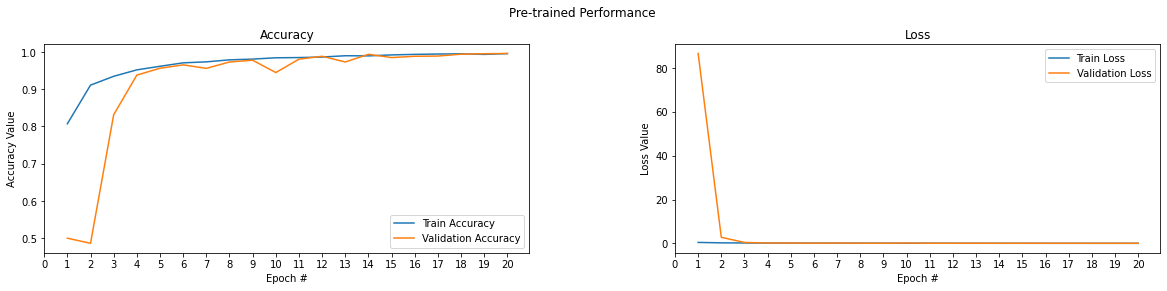

In [70]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# now for test videos predicting for every frame

In [82]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
path='test'
i=0
for vid in os.listdir(path):
    if vid!='test1':
        f=path+"/"+vid 
        cap = cv2.VideoCapture(f)

        classifier = cv2.CascadeClassifier('hcd.xml')
        real=0
        fake=0
        j=0

        frame_count = []
        frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
        #print(cap)   
         #print(cap)   
        while (cap.isOpened()):
            (ret, im) = cap.read()
            if ret == True:
                if j%8==0:
                    face = classifier.detectMultiScale(im,minNeighbors=20)
                    for (x, y, w, h) in face:
                        roi = im[y:y+h, x:x+w]
                        resized=cv2.resize(roi,(128,128))
                        resized_arr = image.img_to_array(resized)
                        resized_arr=resized_arr/255
                        resized_arr = np.expand_dims(resized_arr, axis = 0)
                        result = model.predict(resized_arr)
                        #print(result)
                        predicted_class_indices=np.argmax(result,axis=1)
                        #print(predicted_class_indices)
                        if predicted_class_indices==1:
                            real+=1
                        else:
                            fake+=1
                        cv2.waitKey(1)
                j+=1
            else:
                break
        cap.release()
        cv2.destroyAllWindows()
        #real_per=real/frame_count[0]
        #fake_per=fake/frame_count[0]
        #new_real=0.7*real
        if fake>real:
            print(i,vid,'fake',real,fake )
            df['label'][i]='fake'
            #df['fake'][i]=fake
            #df['real'][i]=real
        else:
            print(i,vid,'real',real,fake )

           # print(fake)
           # print(frame_count)
            df['label'][i]='real'
            #df['real'][i]=real
            #df['fake'][i]=fake
        i+=1    
    
df['label'].replace({'fake':0, 'real':1}, inplace=True)    
  

0 00011.mp4 real 38 21


<ipython-input-82-a9d02ce3b105>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i]='real'


1 00021.mp4 fake 21 29


<ipython-input-82-a9d02ce3b105>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i]='fake'


2 00023.mp4 real 39 1
3 00024.mp4 real 69 0
4 00036.mp4 real 55 14
5 00047.mp4 real 58 0
6 00048.mp4 real 38 15
7 00061.mp4 real 33 8
8 00063.mp4 real 49 8
9 00076.mp4 real 91 0
10 00082.mp4 real 58 0
11 00092.mp4 real 24 1
12 00095.mp4 real 50 1
13 00106.mp4 real 19 4
14 00119.mp4 real 50 3
15 00133.mp4 fake 9 40
16 00138.mp4 fake 10 51
17 00168.mp4 real 60 4
18 00170.mp4 real 30 7
19 00188.mp4 real 60 0
20 00193.mp4 real 48 0
21 00194.mp4 real 28 18
22 00197.mp4 real 48 11
23 00202.mp4 fake 17 50
24 00207.mp4 real 10 0
25 00208.mp4 real 53 1
26 00213.mp4 real 51 0
27 00227.mp4 real 64 0
28 00236.mp4 real 59 0
29 00244.mp4 fake 6 31
30 00250.mp4 real 29 6
31 00251.mp4 fake 10 30
32 00252.mp4 real 29 0
33 00253.mp4 real 4 0
34 00254.mp4 real 58 0
35 00255.mp4 real 40 0
36 00256.mp4 real 40 0
37 00257.mp4 real 40 0
38 00258.mp4 real 58 2
39 00259.mp4 real 39 2
40 00260.mp4 real 37 1
41 00261.mp4 real 24 1
42 00262.mp4 real 41 0
43 00263.mp4 real 41 0
44 00264.mp4 real 43 0
45 00265.mp4 

279 id2_id6_0002.mp4 fake 2 44
280 id2_id9_0008.mp4 fake 15 47
281 id30_0007.mp4 real 38 19
282 id30_id20_0004.mp4 fake 1 38
283 id30_id21_0002.mp4 fake 6 53
284 id30_id21_0005.mp4 fake 0 56
285 id30_id23_0002.mp4 fake 16 43
286 id30_id23_0007.mp4 fake 7 50
287 id30_id26_0004.mp4 fake 2 39
288 id30_id26_0006.mp4 real 19 15
289 id30_id28_0000.mp4 fake 7 53
290 id30_id28_0004.mp4 fake 1 38
291 id30_id28_0006.mp4 real 21 13
292 id30_id32_0006.mp4 real 21 13
293 id30_id34_0003.mp4 fake 16 43
294 id30_id35_0009.mp4 fake 0 60
295 id30_id3_0002.mp4 fake 23 36
296 id30_id3_0006.mp4 real 30 4
297 id30_id4_0001.mp4 fake 19 38
298 id30_id6_0007.mp4 fake 7 50
299 id31_0003.mp4 fake 1 53
300 id31_0004.mp4 fake 17 42
301 id31_0007.mp4 fake 6 14
302 id31_id16_0002.mp4 fake 1 60
303 id31_id2_0004.mp4 fake 9 50
304 id31_id30_0009.mp4 fake 0 57
305 id31_id33_0008.mp4 fake 25 42
306 id31_id33_0009.mp4 fake 0 55
307 id32_0002.mp4 real 60 2
308 id32_0003.mp4 real 43 14
309 id32_0006.mp4 fake 19 25
310 id32

In [85]:
df=df.drop(columns=["real","fake"])

In [87]:
df.to_csv("deepfake.csv",index=False)

In [93]:
labels=pd.read_csv("labels file.csv")

In [94]:
labels

,id,actual_label
0,00011.mp4,1
1,00021.mp4,0
2,00023.mp4,1
3,00024.mp4,1
4,00036.mp4,1
...,...,...
513,id9_id2_0008.mp4,0
514,id9_id3_0000.mp4,1
515,id9_id3_0009.mp4,0
516,id9_id6_0000.mp4,0


In [95]:
df

,id,label
0,00011.mp4,1
1,00021.mp4,0
2,00023.mp4,1
3,00024.mp4,1
4,00036.mp4,1
...,...,...
513,id9_id2_0008.mp4,0
514,id9_id3_0000.mp4,1
515,id9_id3_0009.mp4,0
516,id9_id6_0000.mp4,0


In [96]:
actual=list(labels['actual_label'])
predicted=list(df['label'])

In [97]:
actual


0      1
1      0
2      1
3      1
4      1
      ..
513    0
514    1
515    0
516    0
517    0
Name: actual_label, Length: 518, dtype: int64

In [98]:
predicted

0      1
1      0
2      1
3      1
4      1
      ..
513    0
514    1
515    0
516    0
517    0
Name: label, Length: 518, dtype: int64

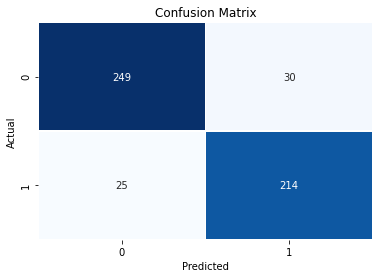

1-->Real
0-->Fake


In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(actual, predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(str(1)+"-->"+"Real")
print(str(0)+"-->"+"Fake")

In [108]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score
accuracy = accuracy_score(actual, predicted)

# Calculate precision
precision = precision_score(actual, predicted)

# Calculate F1-score
f1 = f1_score(actual, predicted)
recall = recall_score(actual, predicted)

# Print the recall



# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1-score: 0.89
